In [25]:
import tensorflow as tf
import tensorflow_datasets as tfds

data, metadata = tfds.load("cats_vs_dogs",as_supervised=True, with_info=True)

In [4]:
metadata

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmp2u4o2ouztfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
   

In [5]:
data

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

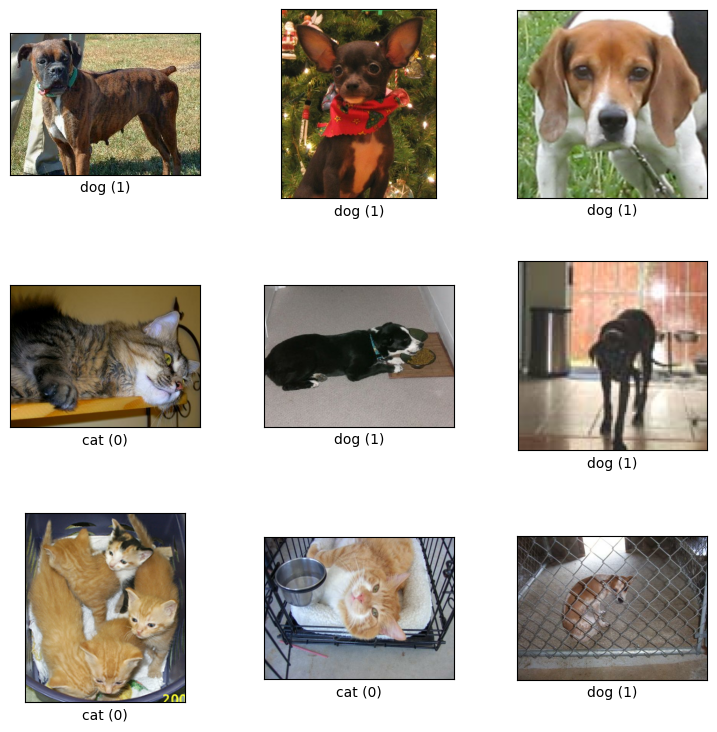

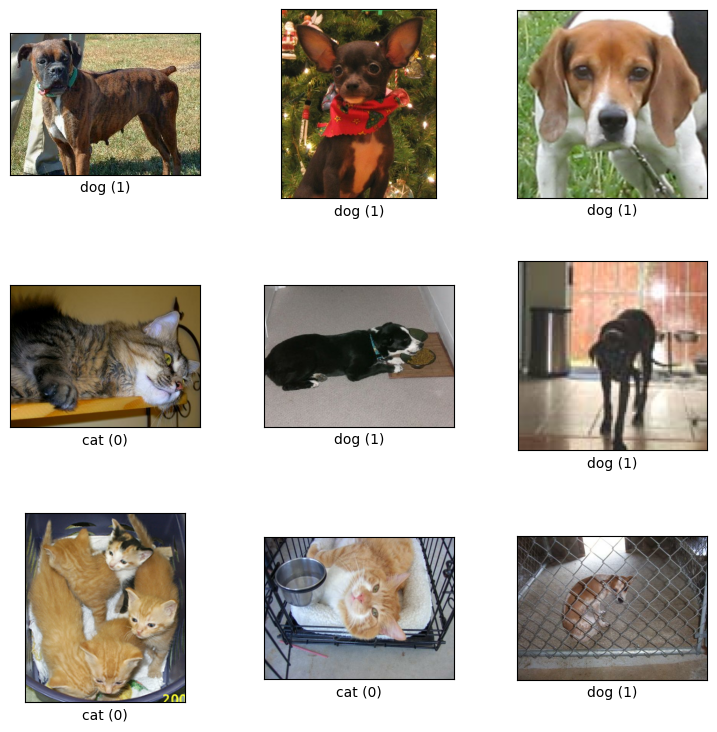

In [6]:
tfds.show_examples(data["train"],metadata)

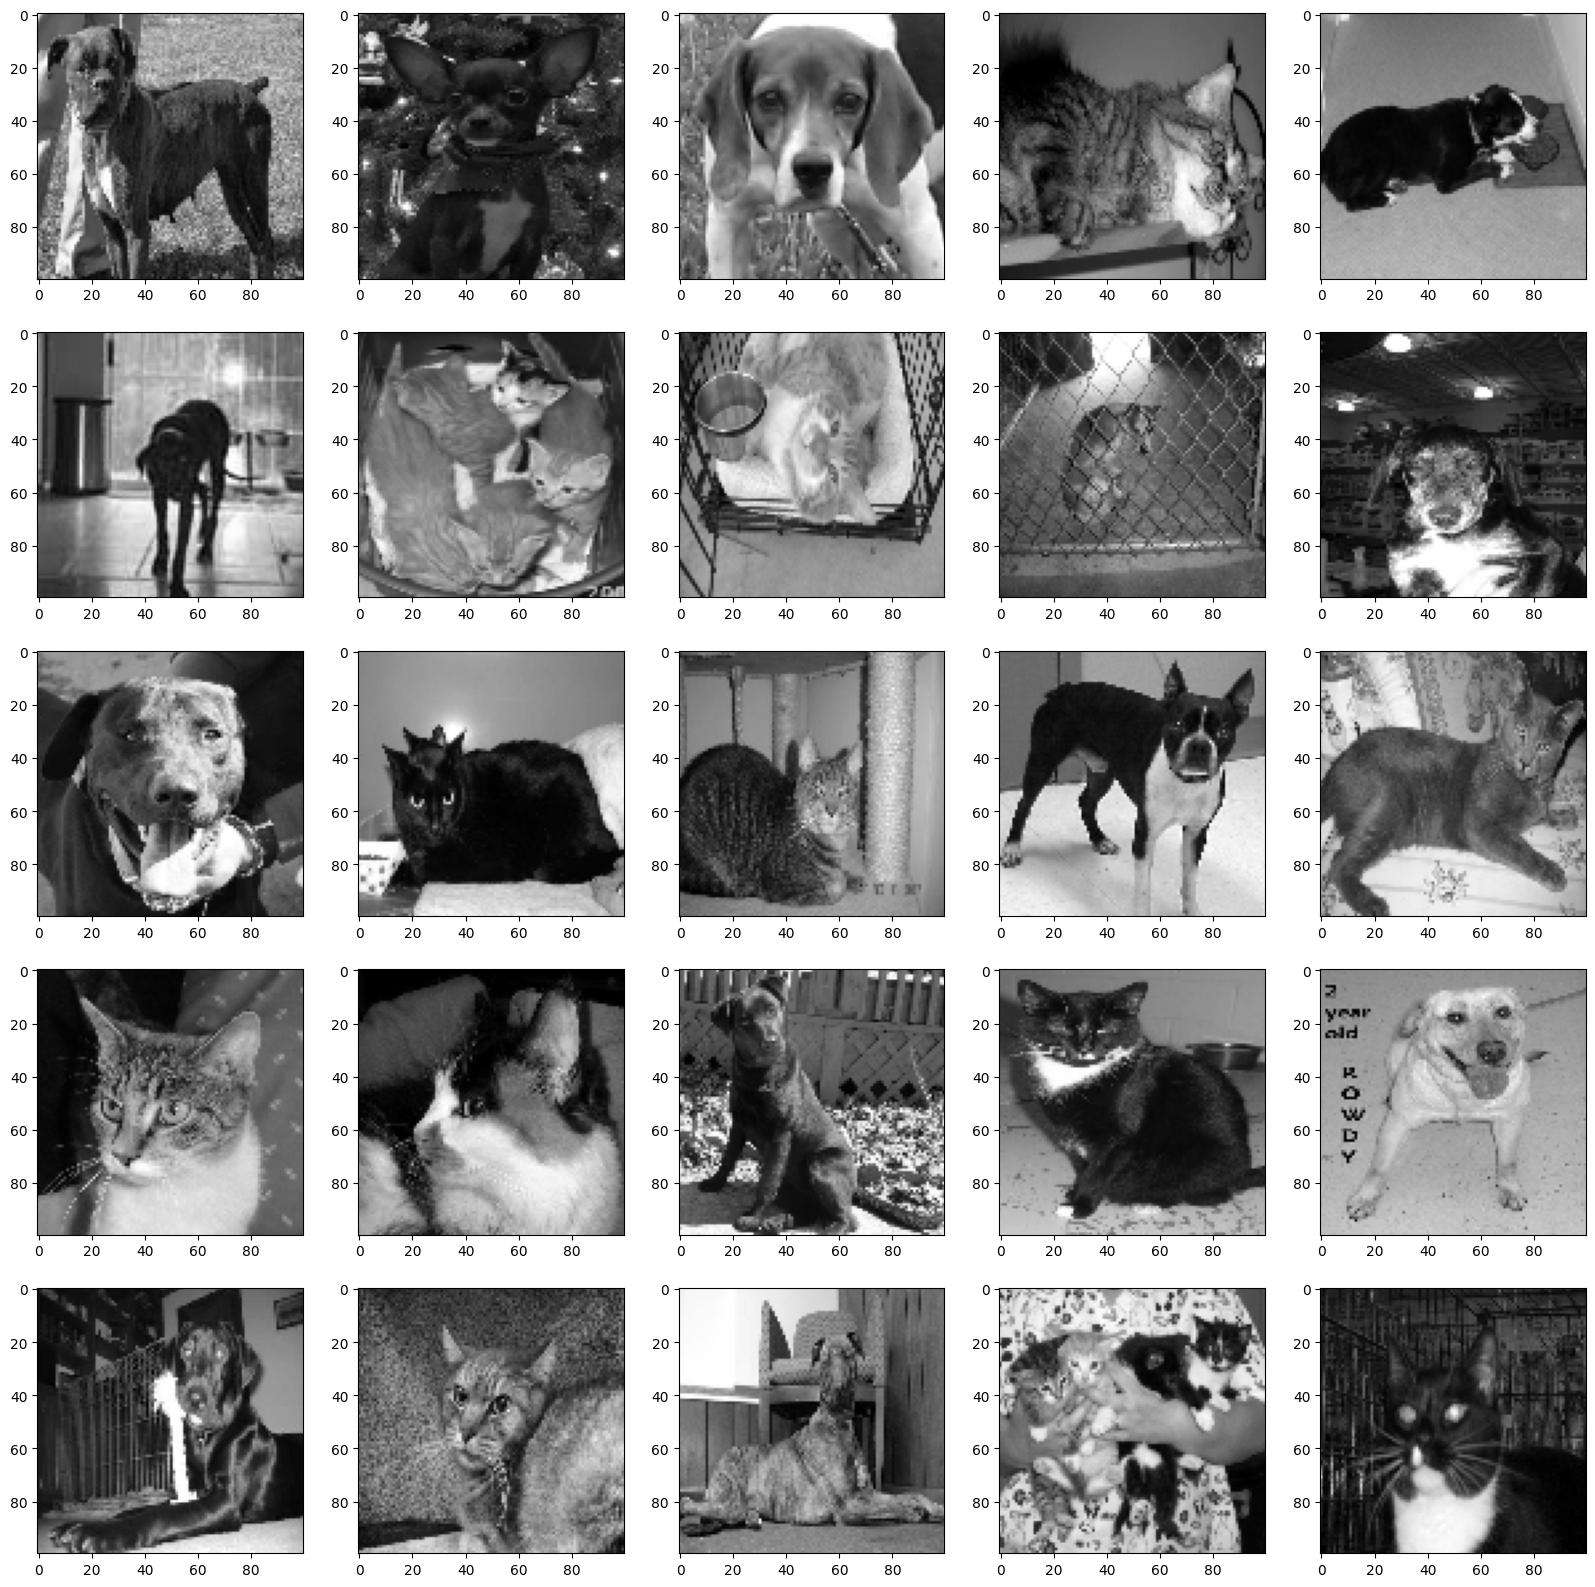

In [13]:
import matplotlib.pyplot as plt
import cv2 #transform imagess

plt.figure(figsize=(20,20))

SIZE_IMG = 100

for i, (image,tag) in enumerate(data["train"].take(25)):
  image = cv2.resize(image.numpy(),(SIZE_IMG,SIZE_IMG)) #rezize the image
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  plt.subplot(5,5,i+1)
  plt.imshow(image, cmap="gray")

In [15]:
data_train = []

In [18]:
for i, (image,tag) in enumerate(data["train"]):
  image = cv2.resize(image.numpy(),(SIZE_IMG,SIZE_IMG)) #rezize the image
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image=image.reshape(SIZE_IMG,SIZE_IMG,1)  #thats for indicate to the model thast its only one chanel of color
  data_train.append([image,tag])

In [19]:
len(data_train)

23287

In [20]:
x = []
y = []

for image,tag in data_train:
  x.append(image)
  y.append(tag)



In [22]:
import numpy as np
x = np.array(x).astype(float) / 255

In [23]:
y = np.array(y)

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu", input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu", input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu", input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100 , activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")


])

In [31]:
model.compile(
    optimizer="adam", loss= "binary_crossentropy", metrics=["accuracy"]
)

In [32]:
model.fit(
    x,y,batch_size=32, validation_split=0.15,epochs=50
)

Epoch 1/50
619/619 [==============================] - 20s 14ms/step - loss: 0.6291 - accuracy: 0.6281 - val_loss: 0.5429 - val_accuracy: 0.7155
Epoch 2/50
619/619 [==============================] - 8s 13ms/step - loss: 0.4899 - accuracy: 0.7640 - val_loss: 0.4571 - val_accuracy: 0.7805
Epoch 3/50
619/619 [==============================] - 7s 12ms/step - loss: 0.4082 - accuracy: 0.8156 - val_loss: 0.4095 - val_accuracy: 0.8125
Epoch 4/50
619/619 [==============================] - 8s 12ms/step - loss: 0.3424 - accuracy: 0.8498 - val_loss: 0.3807 - val_accuracy: 0.8294
Epoch 5/50
619/619 [==============================] - 8s 12ms/step - loss: 0.2722 - accuracy: 0.8842 - val_loss: 0.3884 - val_accuracy: 0.8349
Epoch 6/50
619/619 [==============================] - 8s 13ms/step - loss: 0.2043 - accuracy: 0.9158 - val_loss: 0.4087 - val_accuracy: 0.8360
Epoch 7/50
619/619 [==============================] - 9s 14ms/step - loss: 0.1357 - accuracy: 0.9470 - val_loss: 0.4676 - val_accuracy: 0.832

In [ ]:
#dropout
#data sum